In [14]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [15]:
data=pd.read_csv("id3.csv")

In [16]:
print(data)

    Day Outlook Temperature Humidity    Wind Play
0     1   Sunny         Hot     High    Weak   No
1     2   Sunny         Hot     High  Strong   No
2     3  Cloudy         Hot     High    Weak  Yes
3     4    Rain        Mild     High    Weak  Yes
4     5    Rain        Cool   Normal    Weak  Yes
5     6    Rain        Cool   Normal  Strong   No
6     7  Cloudy        Cool   Normal  Strong  Yes
7     8   Sunny        Mild     High    Weak   No
8     9   Sunny        Cool   Normal    Weak  Yes
9    10    Rain        Mild   Normal    Weak  Yes
10   11   Sunny        Mild   Normal  Strong  Yes
11   12  Cloudy        Mild     High  Strong  Yes
12   13  Cloudy         Hot   Normal    Weak  Yes
13   14    Rain        Mild     High  Strong   No


In [17]:
display(data)

,Day,Outlook,Temperature,Humidity,Wind,Play
0,1,Sunny,Hot,High,Weak,No
1,2,Sunny,Hot,High,Strong,No
2,3,Cloudy,Hot,High,Weak,Yes
3,4,Rain,Mild,High,Weak,Yes
4,5,Rain,Cool,Normal,Weak,Yes
5,6,Rain,Cool,Normal,Strong,No
6,7,Cloudy,Cool,Normal,Strong,Yes
7,8,Sunny,Mild,High,Weak,No
8,9,Sunny,Cool,Normal,Weak,Yes
9,10,Rain,Mild,Normal,Weak,Yes


In [18]:
data=data.drop(columns=["Day"])

In [19]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [20]:
print(x)

   Outlook Temperature Humidity    Wind
0    Sunny         Hot     High    Weak
1    Sunny         Hot     High  Strong
2   Cloudy         Hot     High    Weak
3     Rain        Mild     High    Weak
4     Rain        Cool   Normal    Weak
5     Rain        Cool   Normal  Strong
6   Cloudy        Cool   Normal  Strong
7    Sunny        Mild     High    Weak
8    Sunny        Cool   Normal    Weak
9     Rain        Mild   Normal    Weak
10   Sunny        Mild   Normal  Strong
11  Cloudy        Mild     High  Strong
12  Cloudy         Hot   Normal    Weak
13    Rain        Mild     High  Strong


In [21]:
print(y)

0      No
1      No
2     Yes
3     Yes
4     Yes
5      No
6     Yes
7      No
8     Yes
9     Yes
10    Yes
11    Yes
12    Yes
13     No
Name: Play, dtype: object


In [25]:
def entropy(y):
    values, counts = np.unique(y, return_counts=True)
    probs = counts / counts.sum()
    ent = -np.sum(probs * np.log2(probs))
    return ent


In [26]:
print("Entropy:", entropy(data["Play"]))


Entropy: 0.9402859586706311


In [31]:
def information_gain(data, split_attribute, target_name):
    total_entropy = entropy(data[target_name])

    values, counts = np.unique(data[split_attribute], return_counts=True)

    weighted_entropy = 0
    for i in range(len(values)):
        subset = data[data[split_attribute] == values[i]]
        subset_entropy = entropy(subset[target_name])
        weighted_entropy += (counts[i] / np.sum(counts)) * subset_entropy

    IG = total_entropy - weighted_entropy

    return IG


print("Information Gain of each attribute:\n")

for feature in x.columns:
    ig = information_gain(data, feature, y.name)
    print(f"IG({feature}) = {ig:.4f}")

Information Gain of each attribute:

IG(Outlook) = 0.2467
IG(Temperature) = 0.0292
IG(Humidity) = 0.1518
IG(Wind) = 0.0481


In [34]:
IG={feature:information_gain(data,feature,y.name)for feature in x.columns}
root_node = max(IG, key=IG.get)

print("\nRoot Node (Highest Information Gain):")
print(root_node)


Root Node (Highest Information Gain):
Outlook


In [41]:
print(f"\nChild nodes for root attribute '{root_node}':")
for value in data[root_node].unique():
    subset = data[data[root_node] == value]
    print(f"\n{root_node} = {value}")
    print(subset)


Child nodes for root attribute 'Outlook':

Outlook = Sunny
   Outlook Temperature Humidity    Wind Play
0    Sunny         Hot     High    Weak   No
1    Sunny         Hot     High  Strong   No
7    Sunny        Mild     High    Weak   No
8    Sunny        Cool   Normal    Weak  Yes
10   Sunny        Mild   Normal  Strong  Yes

Outlook = Cloudy
   Outlook Temperature Humidity    Wind Play
2   Cloudy         Hot     High    Weak  Yes
6   Cloudy        Cool   Normal  Strong  Yes
11  Cloudy        Mild     High  Strong  Yes
12  Cloudy         Hot   Normal    Weak  Yes

Outlook = Rain
   Outlook Temperature Humidity    Wind Play
3     Rain        Mild     High    Weak  Yes
4     Rain        Cool   Normal    Weak  Yes
5     Rain        Cool   Normal  Strong   No
9     Rain        Mild   Normal    Weak  Yes
13    Rain        Mild     High  Strong   No


In [46]:
from sklearn.tree import export_text


In [51]:
le_dict = {}
X_encoded = x.copy()

for col in x.columns:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(x[col])
    le_dict[col] = le

y_le = LabelEncoder()
y_encoded = y_le.fit_transform(y)


dt_model = DecisionTreeClassifier(criterion="entropy", random_state=0)  # ID3-like
dt_model.fit(X_encoded, y_encoded)



DecisionTreeClassifier(criterion='entropy', random_state=0)

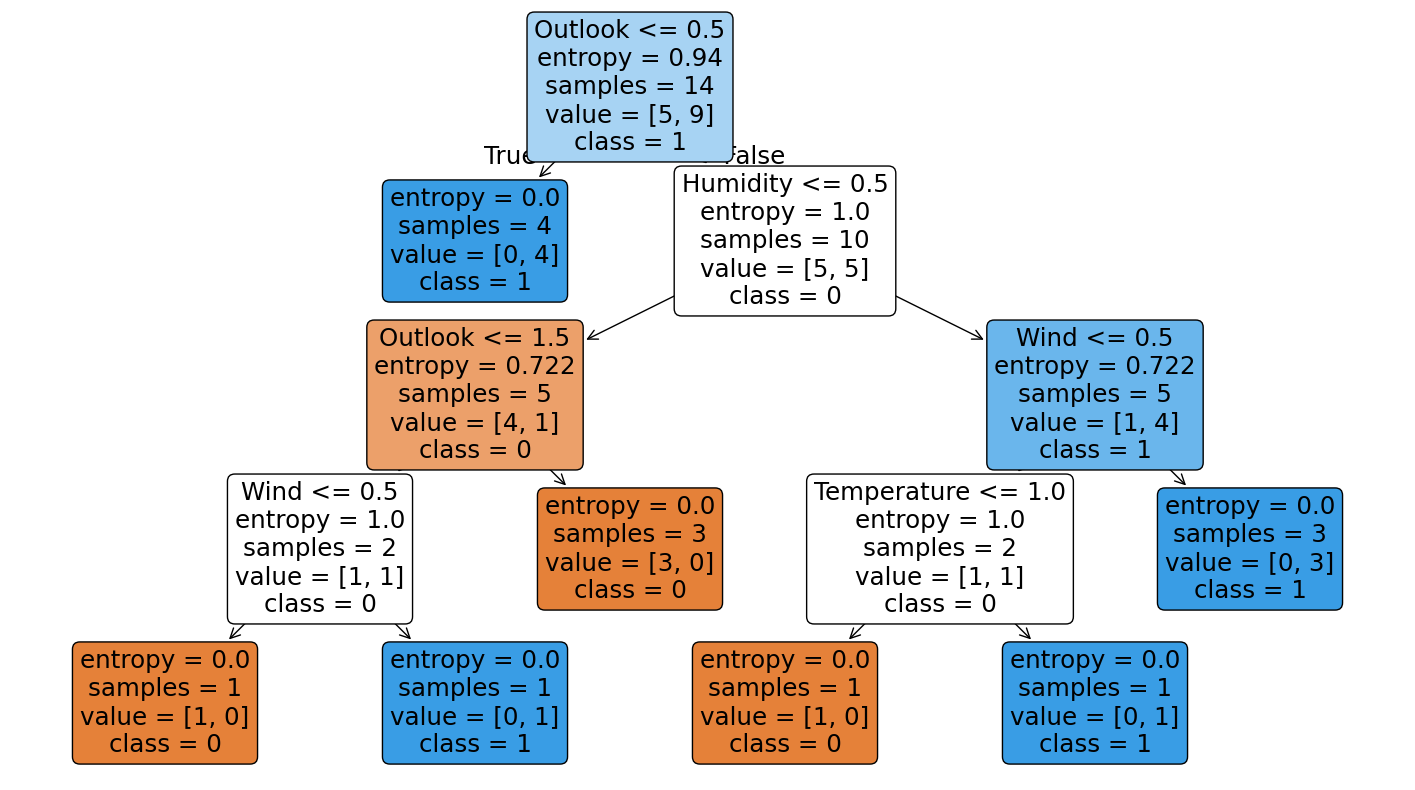

In [53]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(18,10))
plot_tree(
    dt_model,
    feature_names=list(x.columns),
    class_names=[str(c) for c in y_le.classes_],  # ✅ FIX
    filled=True,
    rounded=True
)
plt.show()
